In [1]:
# def load_data(loc:str, index:list):
#     df = pandas.read_csv(f'data/{loc}_solar19.csv')
#     df['idx'] = index
#     df = df.set_index('idx')
#     return df
# idx = [(i,j,k) for i,j,k in product(range(1), range(365), range(24))]
# weather_ny = load_data('ny', idx)[['DNI', 'Wind Speed']]
# weather_ny = weather_ny.rename(columns= {'DNI': 'dni', 'Wind Speed': 'wind_speed'})
# weather_sd = load_data('sd', idx)[['dni', 'wind_speed']]
# weather_ho = load_data('ho', idx)[['dni', 'wind_speed']]""
# demand_sd = pandas.read_excel('data/HistoricalEMSHourlyLoad-2019.xlsx', index_col= 0)[['SDGE']]
# demand_ho = pandas.read_excel('data/Native_Load_2019.xlsx')[['COAST']]
# demand_ny = DataFrame(pandas.read_csv('data/NYC_load.csv')['Load']) #from Will and Doga
# ng_price = make_henry_price_df(
#     file_name='data/Henry_Hub_Natural_Gas_Spot_Price_Daily.csv', year=2020)
# ng_price = ng_price.drop(columns= 'scales')
# ng_price = remove_outliers(ng_price, sd_cuttoff = 3)
# ng_price = pandas.concat([ng_price])

In [2]:
import sys

sys.path.append('src')

In [3]:
from energiapy.components import *
from energiapy.environ import *
from pandas import DataFrame
from dataclasses import fields, field, dataclass

In [4]:
from energiapy.elements.parameter import Prm
from energiapy.elements.variable import Vrb
from energiapy.elements.expression import Exn
from energiapy.elements.constraint import Cns

In [5]:
a = Prm(2) + Prm(3)
b = Prm(5) * Prm(3)
c = Prm(5) / Prm(3)

In [6]:
d = list(range(17))
e = list(range(13))

In [7]:
d = [i / 5 for i in range(6)]
e = [i / 4 for i in range(5)]
f = [i / 3 for i in range(4)]

In [8]:
d = 365
m = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
h = 8760

In [9]:
def ranger(d: list | range):
    if isinstance(d, int):
        d = list(range(d + 1))
        return [i / max(d) for i in d]
    if isinstance(d, list):
        return [i / sum(d) for i in d]

In [10]:
s = sorted(set().union(*[ranger(i) for i in [d, m, h]]))

In [11]:
a = ranger(4)
b = ranger(5)

In [12]:
s = sorted(set().union(a, b))

In [13]:
a

[0.0, 0.25, 0.5, 0.75, 1.0]

In [14]:
s

[0.0, 0.2, 0.25, 0.4, 0.5, 0.6, 0.75, 0.8, 1.0]

In [2]:
from pyomo.environ import *

In [16]:
# from sympy import symbols

# 4 - s00*27 + p0*20 = 0
# 5 - s01*27 + p1*20 = 0
# 6 - s10*11 + p2*20 = 0
# 3 - s11*11 + p3*20 = 0

# s00 + s01 = 1
# s10 + s11 = 1

# p0 + p1 + p2 + p3 = 1

In [17]:
from sympy import symbols, Eq, solve, Rel, nonlinsolve

# Define variables
s00, s01, s10, s11, p0, p1, p2, p3 = symbols(
    's00 s01 s10 s11 p0 p1 p2 p3', positive=True
)

# Define the equations
equations = [
    Eq(4 - s00 * 27 + p0 * 20, 0),
    Eq(5 - s01 * 27 + p1 * 20, 0),
    Eq(6 - s10 * 11 + p2 * 20, 0),
    Eq(3 - s11 * 11 + p3 * 20, 0),
    Eq(s00 + s01, 1),
    Eq(s10 + s11, 1),
    Eq(p0 + p1 + p2 + p3, 1),
    # Rel(9/10 - p1, 0, '>'),
    # Rel(1/10 - p3, 0, '>'),
    # Rel(22/27 - 20*p1/27, 0, '>'),
    # Rel(8/11 - 20*p3/11, 0, '>'),
]
solution = solve(equations, [s00, s01, s10, s11, p0, p1, p2, p3])

# Solve the system
# solution = nonlinsolve(equations, [s00, s01, s10, s11, p0, p1, p2, p3])
print(solution)

{p0: 9/10 - p1, p2: 1/10 - p3, s00: 22/27 - 20*p1/27, s01: 20*p1/27 + 5/27, s10: 8/11 - 20*p3/11, s11: 20*p3/11 + 3/11}


In [18]:
# m.b = Var(list(range(4)), domain=NonNegativeReals)
# m.s = Var(list(range(2)), domain=NonNegativeReals)
# m.p = Var(list(range(1)), domain=NonNegativeReals)

In [8]:
m = ConcreteModel()


m.b = Var(list(range(4)), domain=NonNegativeReals)
m.s = Var(list(range(4)), domain=NonNegativeReals)
m.p = Var(list(range(4)), domain=NonNegativeReals)


m.c0 = Constraint(expr=m.b[0] <= 12)
m.c1 = Constraint(expr=m.b[1] <= 15)
m.c2 = Constraint(expr=m.b[2] <= 18)
m.c3 = Constraint(expr=m.b[3] <= 9)
m.c0_ = Constraint(expr=m.b[0] >= 3)
m.c1_ = Constraint(expr=m.b[1] >= 3)
m.c2_ = Constraint(expr=m.b[2] >= 3)
m.c3_ = Constraint(expr=m.b[3] >= 3)

m.c4 = Constraint(expr=m.s[0] + m.s[1] >= 10)
m.c5 = Constraint(expr=m.s[2] + m.s[3] >= 11)

m.c4_ = Constraint(expr=m.s[0] + m.s[1] <= 15)
m.c5_ = Constraint(expr=m.s[2] + m.s[3] <= 17)

m.c6 = Constraint(expr=m.p[0] + m.p[1] + m.p[2] + m.p[3] <= 20)
m.c6_ = Constraint(expr=m.p[0] + m.p[1] + m.p[2] + m.p[3] >= 15)


m.c7 = Constraint(expr=m.b[0] - m.s[0] + m.p[0] == 0)
m.c8 = Constraint(expr=m.b[1] - m.s[1] + m.p[1] == 0)
m.c9 = Constraint(expr=m.b[2] - m.s[2] + m.p[2] == 0)
m.c10 = Constraint(expr=m.b[3] - m.s[3] + m.p[3] == 0)

m.conv1 = Constraint(expr=m.p[0] == (1 / 3) * m.b[0])
m.conv2 = Constraint(expr=m.p[1] == (1 / 3) * m.b[1])
m.conv3 = Constraint(expr=m.p[2] == (1 / 3) * m.b[2])
m.conv4 = Constraint(expr=m.p[3] == (1 / 3) * m.b[3])


m.o = Objective(
    expr=-3 * (m.s[0] + m.s[1] + m.s[2] + m.s[3])
    + 2 * (m.b[0] + m.b[1] + m.b[2] + m.b[3])
    + 0.5 * (m.p[0] + m.p[1] + m.p[2] + m.p[3])
)
res = SolverFactory('gurobi').solve(m)

m.pprint()

model.name="unknown";
    - termination condition: infeasibleOrUnbounded
    - message from solver: Problem proven to be infeasible or unbounded.
3 Var Declarations
    b : Size=4, Index={0, 1, 2, 3}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
          3 :     0 :  None :  None : False :  True : NonNegativeReals
    p : Size=4, Index={0, 1, 2, 3}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
          3 :     0 :  None :  None : False :  True : NonNegativeReals
    s : Size=4, Index={0, 1, 2, 3}
        Key : Lower : Value : Upper : Fi

In [10]:
{1,2}^{1,2, 3}

{3}

In [44]:
s = list(m.s.extract_values().values())
ms = [-3 * i for i in s]
b = list(m.b.extract_values().values())
mb = [2 * i for i in b]
p = list(m.p.extract_values().values())
mp = [0.5 * i for i in p]
o = m.o()

In [45]:
s, b, p, o

([10.0, 5.0, 16.0, 1.0], [4.0, 5.0, 2.0, 1.0], [6.0, 0.0, 14.0, 0.0], -62.0)

In [63]:
sum(ms), sum(mb), sum(mp)

(-96.0, 24.0, 10.0)

In [48]:
sum(ms) + sum(mb) + sum(mp)

-62.0

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rc

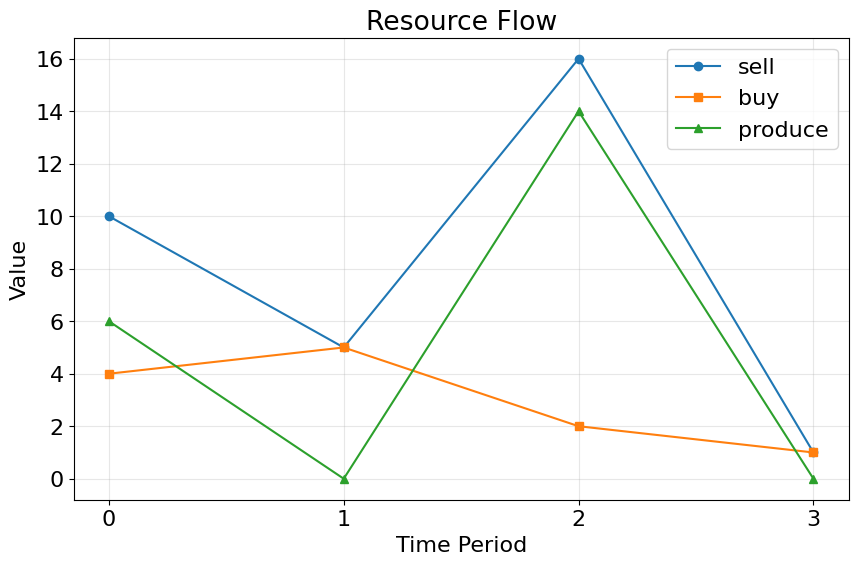

In [46]:
x_values = range(4)
rc('font', size=16)
fig, ax = plt.subplots(figsize=(10, 6))
# Plotting the data
ax.plot(x_values, s, label='sell', marker='o')
ax.plot(x_values, b, label='buy', marker='s')
ax.plot(x_values, p, label='produce', marker='^')

# Adding title and labels
plt.title("Resource Flow")
plt.xlabel("Time Period")
plt.ylabel("Value")
plt.xticks(x_values)
plt.grid(alpha=0.3)
# Showing a legend
plt.legend()

# Display the graph
plt.show()

x_values = range(4)
rc('font', size=16)
fig, ax = plt.subplots(figsize=(10, 6))
# Plotting the data
ax.plot(x_values, ms, label='$ sell', marker='o')
ax.plot(x_values, mb, label='$ buy', marker='s')
ax.plot(x_values, mp, label='$ produce', marker='^')

# Adding title and labels
plt.title("Cash Flow")
plt.xlabel("Time Period")
plt.ylabel("Value")
plt.xticks(x_values)
plt.grid(alpha=0.3)
# Showing a legend
plt.legend()

# Display the graph
plt.show()

In [49]:
m = ConcreteModel()

m.b = Var(list(range(4)), domain=NonNegativeReals)
m.s = Var(list(range(2)), domain=NonNegativeReals)
m.p = Var(list(range(1)), domain=NonNegativeReals)

m.c0 = Constraint(expr=m.b[0] <= 4)
m.c1 = Constraint(expr=m.b[1] <= 5)
m.c2 = Constraint(expr=m.b[2] <= 6)
m.c3 = Constraint(expr=m.b[3] <= 3)

m.c0_ = Constraint(expr=m.b[0] >= 1)
m.c1_ = Constraint(expr=m.b[1] >= 1)
m.c2_ = Constraint(expr=m.b[2] >= 1)
m.c3_ = Constraint(expr=m.b[3] >= 1)


m.c4 = Constraint(expr=m.s[0] >= 10)
m.c5 = Constraint(expr=m.s[1] >= 11)


m.c4_ = Constraint(expr=m.s[0] <= 15)
m.c5_ = Constraint(expr=m.s[1] <= 17)

m.c6 = Constraint(expr=m.p[0] <= 20)
m.c6_ = Constraint(expr=m.p[0] >= 15)


m.c7 = Constraint(
    expr=m.b[0] + m.b[1] + m.b[2] + m.b[3] - m.s[0] - m.s[1] + m.p[0] == 0
)

m.o = Objective(
    expr=-3 * (m.s[0] + m.s[1])
    + 2 * (m.b[0] + m.b[1] + m.b[2] + m.b[3])
    + 0.5 * (m.p[0])
)
res = SolverFactory('gurobi').solve(m)


m.pprint()

3 Var Declarations
    b : Size=4, Index={0, 1, 2, 3}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   4.0 :  None : False : False : NonNegativeReals
          1 :     0 :   1.0 :  None : False : False : NonNegativeReals
          2 :     0 :   6.0 :  None : False : False : NonNegativeReals
          3 :     0 :   1.0 :  None : False : False : NonNegativeReals
    p : Size=1, Index={0}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  20.0 :  None : False : False : NonNegativeReals
    s : Size=2, Index={0, 1}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  15.0 :  None : False : False : NonNegativeReals
          1 :     0 :  17.0 :  None : False : False : NonNegativeReals

1 Objective Declarations
    o : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : -3*(s[0] + s[1]) + 2*(b[0] + b[1] + b[2] + b[3]) + 0.5*p[0]

15 

In [59]:
s = list(m.s.extract_values().values())
# s = [15.0, 15.0, 17.0, 17.0]
ms = [-3 * i for i in s]
b = list(m.b.extract_values().values())
mb = [2 * i for i in b]
p = list(m.p.extract_values().values())
# p = p*4
mp = [0.5 * i for i in p]
o = m.o()

Reduce step 1

In [198]:
m = ConcreteModel()

m.in1 = Var(list(range(4)), domain=NonNegativeReals)
m.out = Var(list(range(2)), domain=NonNegativeReals)
m.in2 = Var(list(range(1)), domain=NonNegativeReals)

m.c0 = Constraint(expr=m.in1[0] <= 4)
m.c1 = Constraint(expr=m.in1[1] <= 5)
m.c2 = Constraint(expr=m.in1[2] <= 6)
m.c3 = Constraint(expr=m.in1[3] <= 3)

m.c0_ = Constraint(expr=m.in1[0] >= 1)
m.c1_ = Constraint(expr=m.in1[1] >= 1)
m.c2_ = Constraint(expr=m.in1[2] >= 1)
m.c3_ = Constraint(expr=m.in1[3] >= 1)


m.c4 = Constraint(expr=m.out[0] >= 10)
m.c5 = Constraint(expr=m.out[1] >= 11)


m.c4_ = Constraint(expr=m.out[0] <= 15)
m.c5_ = Constraint(expr=m.out[1] <= 17)

m.c6 = Constraint(expr=m.in2[0] <= 20)
m.c6_ = Constraint(expr=m.in2[0] >= 15)


m.c7 = Constraint(
    expr=m.in1[0] + m.in1[1] + m.in1[2] + m.in1[3] - m.out[0] - m.out[1] + m.in2[0] == 0
)

m.o = Objective(
    expr=-3 * (m.out[0] + m.out[1])
    + 2 * (m.in1[0] + m.in1[1] + m.in1[2] + m.in1[3])
    + 0.5 * (m.in2[0])
)
res = SolverFactory('gurobi').solve(m)


m.pprint()

3 Var Declarations
    in1 : Size=4, Index={0, 1, 2, 3}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   4.0 :  None : False : False : NonNegativeReals
          1 :     0 :   1.0 :  None : False : False : NonNegativeReals
          2 :     0 :   6.0 :  None : False : False : NonNegativeReals
          3 :     0 :   1.0 :  None : False : False : NonNegativeReals
    in2 : Size=1, Index={0}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  20.0 :  None : False : False : NonNegativeReals
    out : Size=2, Index={0, 1}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  15.0 :  None : False : False : NonNegativeReals
          1 :     0 :  17.0 :  None : False : False : NonNegativeReals

1 Objective Declarations
    o : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : -3*(out[0] + out[1]) + 2*(in1[0] + in1[1] + in1[2] + in1[3

In [199]:
out = list(m.out.extract_values().values())
mout = [-3 * i for i in out]
in1 = list(m.in1.extract_values().values())
min1 = [2 * i for i in in1]
in2 = list(m.in2.extract_values().values())
min2 = [0.5 * i for i in in2]
o = m.o()

In [200]:
out, in1, in2, o

([15.0, 17.0], [4.0, 1.0, 6.0, 1.0], [20.0], -62.0)

In [201]:
mout, min1, min2

([-45.0, -51.0], [8.0, 2.0, 12.0, 2.0], [10.0])

In [232]:
m = ConcreteModel()

m.in1 = Var(list(range(4)), domain=NonNegativeReals)
m.out = Var(list(range(2)), domain=NonNegativeReals)
m.in2 = Var(list(range(1)), domain=NonNegativeReals)

m.in3 = Var(list(range(3)), domain=NonNegativeReals, doc='water')

m.c0 = Constraint(expr=m.in1[0] <= 4)
m.c1 = Constraint(expr=m.in1[1] <= 5)
m.c2 = Constraint(expr=m.in1[2] <= 6)
m.c3 = Constraint(expr=m.in1[3] <= 3)

m.c0_ = Constraint(expr=m.in1[0] >= 1)
m.c1_ = Constraint(expr=m.in1[1] >= 1)
m.c2_ = Constraint(expr=m.in1[2] >= 1)
m.c3_ = Constraint(expr=m.in1[3] >= 1)


m.c4 = Constraint(expr=m.out[0] >= 10)
m.c5 = Constraint(expr=m.out[1] >= 11)


m.c4_ = Constraint(expr=m.out[0] <= 15)
m.c5_ = Constraint(expr=m.out[1] <= 17)

m.c6 = Constraint(expr=m.in2[0] <= 20)
m.c6_ = Constraint(expr=m.in2[0] >= 15)


m.c7 = Constraint(
    expr=m.in1[0] + m.in1[1] + m.in1[2] + m.in1[3] - m.out[0] - m.out[1] + m.in2[0] == 0
)

m.c8 = Constraint(expr=m.in3[0] + m.in3[1] + m.in3[2] == 4 * m.in2[0])

m.c91 = Constraint(expr=m.in3[0] <= 24)
m.c92 = Constraint(expr=m.in3[1] <= 28)
m.c93 = Constraint(expr=m.in3[2] <= 36)


m.o = Objective(
    expr=-3 * (m.out[0] + m.out[1])
    + 2 * (m.in1[0] + m.in1[1] + m.in1[2] + m.in1[3])
    + 0.6 * (m.in2[0])
    + 0.1 * (m.in3[0] + m.in3[1] + m.in3[2])
)
res = SolverFactory('gurobi').solve(m)


m.pprint()

out = list(m.out.extract_values().values())
mout = [-3 * i for i in out]
in1 = list(m.in1.extract_values().values())
min1 = [2 * i for i in in1]
in2 = list(m.in2.extract_values().values())
min2 = [0.5 * i for i in in2]

in3 = list(m.in3.extract_values().values())
min3 = [0.1 * i for i in in3]
o = m.o()

4 Var Declarations
    in1 : Size=4, Index={0, 1, 2, 3}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   4.0 :  None : False : False : NonNegativeReals
          1 :     0 :   4.0 :  None : False : False : NonNegativeReals
          2 :     0 :   1.0 :  None : False : False : NonNegativeReals
          3 :     0 :   3.0 :  None : False : False : NonNegativeReals
    in2 : Size=1, Index={0}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  20.0 :  None : False : False : NonNegativeReals
    in3 : water
        Size=3, Index={0, 1, 2}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  24.0 :  None : False : False : NonNegativeReals
          1 :     0 :  20.0 :  None : False : False : NonNegativeReals
          2 :     0 :  36.0 :  None : False : False : NonNegativeReals
    out : Size=2, Index={0, 1}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  15

In [233]:
out, in1, in2, in3, o

([15.0, 17.0], [4.0, 4.0, 1.0, 3.0], [20.0], [24.0, 20.0, 36.0], -54.0)

In [220]:
m = ConcreteModel()

m.g = Var(list(range(4)), domain=NonNegativeReals, doc='in')
m.g_ = Var(list(range(4)), domain=NonNegativeReals, doc='out')
# m.inn = Var(list(range(4)), domain=NonNegativeReals)
# m.out = Var(list(range(2)), domain=NonNegativeReals)
m.phi = Var(list(range(4)), domain=NonNegativeReals)
m.psi = Var(list(range(4)), domain=NonNegativeReals)


# m.c0 = Constraint(expr=m.g[0] <= 15 * 3 * m.psi[0] - 4 * 2 - m.phi[0] * 20 * 0.5)
# m.c1 = Constraint(expr=m.g[1] <= 15 * 3 * m.psi[1] - 5 * 2 - m.phi[1] * 20 * 0.5)
# m.c2 = Constraint(expr=m.g[2] <= 17 * 3 * m.psi[2] - 6 * 2 - m.phi[2] * 20 * 0.5)
# m.c3 = Constraint(expr=m.g[3] <= 17 * 3 * m.psi[3] - 3 * 2 - m.phi[3] * 20 * 0.5)

# m.c0_ = Constraint(expr=m.g_[0] >= 1 * 2 - m.phi[0] * 15 * 0.5 - 10 * 3 * m.psi[0])
# m.c1_ = Constraint(expr=m.g_[1] >= 1 * 2 - m.phi[1] * 15 * 0.5 - 10 * 3 * m.psi[1])
# m.c2_ = Constraint(expr=m.g_[2] >= 1 * 2 - m.phi[2] * 15 * 0.5 - 11 * 3 * m.psi[2])
# m.c3_ = Constraint(expr=m.g_[3] >= 1 * 2 - m.phi[3] * 15 * 0.5 - 11 * 3 * m.psi[3])

# m.c0 = Constraint(expr=m.g[0] <= 15 * 3 * m.psi[0])
# m.c1 = Constraint(expr=m.g[1] <= 15 * 3 * m.psi[1])
# m.c2 = Constraint(expr=m.g[2] <= 17 * 3 * m.psi[2])
# m.c3 = Constraint(expr=m.g[3] <= 17 * 3 * m.psi[3])

# m.c0_ = Constraint(expr= m.g[0] >= 10 * 3 * m.psi[0])
# m.c1_ = Constraint(expr= m.g[1] >= 10 * 3 * m.psi[1])
# m.c2_ = Constraint(expr= m.g[2] >= 11 * 3 * m.psi[2])
# m.c3_ = Constraint(expr= m.g[3] >= 11 * 3 * m.psi[3])


m.c00 = Constraint(expr=m.g_[0] - m.g[0] <= 8 + m.phi[0] * 10 - m.psi[0] * 30)
m.c01 = Constraint(expr=m.g_[1] - m.g[1] <= 10 + m.phi[1] * 10 - m.psi[1] * 30)
m.c02 = Constraint(expr=m.g_[2] - m.g[2] <= 12 + m.phi[2] * 10 - m.psi[2] * 33)
m.c03 = Constraint(expr=m.g_[3] - m.g[3] <= 6 + m.phi[3] * 10 - m.psi[3] * 33)

m.c00_ = Constraint(expr=m.g_[0] - m.g[0] >= 2 + m.phi[0] * 7.5 - m.psi[0] * 45)
m.c01_ = Constraint(expr=m.g_[1] - m.g[1] >= 2 + m.phi[1] * 7.5 - m.psi[1] * 45)
m.c02_ = Constraint(expr=m.g_[2] - m.g[2] >= 2 + m.phi[2] * 7.5 - m.psi[2] * 51)
m.c03_ = Constraint(expr=m.g_[3] - m.g[3] >= 2 + m.phi[3] * 7.5 - m.psi[3] * 51)


m.c7 = Constraint(expr=m.phi[0] + m.phi[1] + m.phi[2] + m.phi[3] == 1)
# m.c8 = Constraint(expr=m.psi[0] + m.psi[1] + m.psi[2] + m.psi[3] == 1)
m.c81 = Constraint(expr=m.psi[0] + m.psi[1] == 1)
m.c82 = Constraint(expr=m.psi[2] + m.psi[3] == 1)


m.ccc = Constraint(expr =  )


m.o = Objective(
    expr=(m.g_[0] + m.g_[1] + m.g_[2] + m.g_[3]) - (m.g[0] + m.g[1] + m.g[2] + m.g[3])
)
res = SolverFactory('gurobi').solve(m)


m.pprint()

g = list(m.g.extract_values().values())
g_ = list(m.g_.extract_values().values())
phi = list(m.phi.extract_values().values())
psi = list(m.psi.extract_values().values())
o = m.o()
g, g_, o

4 Var Declarations
    g : in
        Size=4, Index={0, 1, 2, 3}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  35.5 :  None : False : False : NonNegativeReals
          1 :     0 :   0.0 :  None : False : False : NonNegativeReals
          2 :     0 :  49.0 :  None : False : False : NonNegativeReals
          3 :     0 :   0.0 :  None : False : False : NonNegativeReals
    g_ : out
        Size=4, Index={0, 1, 2, 3}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :  None : False : False : NonNegativeReals
          1 :     0 :   2.0 :  None : False : False : NonNegativeReals
          2 :     0 :   0.0 :  None : False : False : NonNegativeReals
          3 :     0 :   2.0 :  None : False : False : NonNegativeReals
    phi : Size=4, Index={0, 1, 2, 3}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   1.0 :  None : False : False : NonNegativeReals
          1 :     0 :   0.0 

([35.5, 0.0, 49.0, 0.0], [0.0, 2.0, 0.0, 2.0], -80.5)

In [204]:
res

{'Problem': [{'Name': 'x1', 'Lower bound': -80.5, 'Upper bound': -80.5, 'Number of objectives': 1, 'Number of constraints': 11, 'Number of variables': 16, 'Number of binary variables': 0, 'Number of integer variables': 0, 'Number of continuous variables': 16, 'Number of nonzeros': 40, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Return code': '0', 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': '0.0', 'Error rc': 0, 'Time': 0.32619380950927734}], 'Solution': [OrderedDict({'number of solutions': 0, 'number of solutions displayed': 0})]}

In [218]:
m = ConcreteModel()
m.g_ = Var(domain=NonNegativeReals)
m.g = Var(domain=NonNegativeReals)
m.c1 = Constraint(expr=7.5 + 2 + 2 + 2 + 2 - 45 - 51 <= m.g_ - m.g)
m.c2 = Constraint(expr=m.g_ - m.g <= 10 + 7.5 + 7.5 + 7.5 + 7.5 - 30 - 33)

In [219]:
m.pprint()

2 Var Declarations
    g : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    g_ : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

2 Constraint Declarations
    c1 : Size=1, Index=None, Active=True
        Key  : Lower : Body   : Upper : Active
        None : -80.5 : g_ - g :  +Inf :   True
    c2 : Size=1, Index=None, Active=True
        Key  : Lower : Body   : Upper : Active
        None :  -Inf : g_ - g : -23.0 :   True

4 Declarations: g_ g c1 c2


In [178]:
g, phi, psi

([13.0, 14.0, 20.58333333333333, 2.4166666666666683],
 [0.0, 0.0, 0.0, 1.0],
 [0.4666666666666667,
  0.5333333333333333,
  0.6388888888888888,
  0.36111111111111116])

In [184]:
s = [i * j for i, j in zip(g, psi)]
p = [i * j for i, j in zip(g, phi)]

In [185]:
s

[6.066666666666666, 7.466666666666667, 13.150462962962958, 0.8726851851851859]

In [186]:
p

[0.0, 0.0, 0.0, 2.4166666666666683]

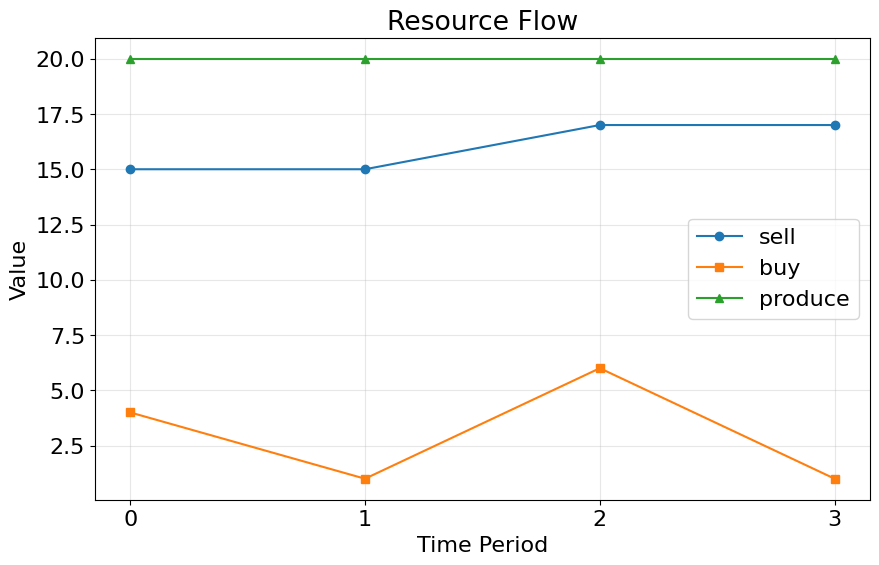

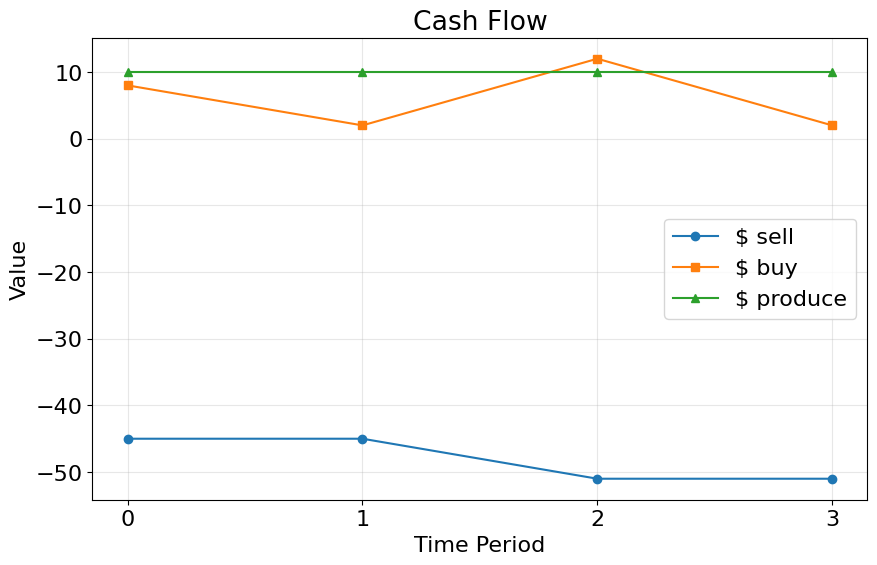

In [57]:
x_values = range(4)

rc('font', size=16)
fig, ax = plt.subplots(figsize=(10, 6))
# Plotting the data
ax.plot(x_values, s, label='sell', marker='o')
ax.plot(x_values, b, label='buy', marker='s')
ax.plot(x_values, p, label='produce', marker='^')

# Adding title and labels
plt.title("Resource Flow")
plt.xlabel("Time Period")
plt.ylabel("Value")
plt.xticks(x_values)
plt.grid(alpha=0.3)
# Showing a legend
plt.legend()

# Display the graph
plt.show()

rc('font', size=16)
fig, ax = plt.subplots(figsize=(10, 6))
# Plotting the data
ax.plot(x_values, ms, label='$ sell', marker='o')
ax.plot(x_values, mb, label='$ buy', marker='s')
ax.plot(x_values, mp, label='$ produce', marker='^')

# Adding title and labels
plt.title("Cash Flow")
plt.xlabel("Time Period")
plt.ylabel("Value")
plt.xticks(x_values)
plt.grid(alpha=0.3)
# Showing a legend
plt.legend()

# Display the graph
plt.show()

In [ ]:
m = ConcreteModel()

m.b = Var(list(range(4)), domain=NonNegativeReals)  # plus
m.s = Var(list(range(2)), domain=NonNegativeReals)  # minus
m.p = Var(list(range(1)), domain=NonNegativeReals)  # plus

m.plus = Var(list(range(4)), domain=NonNegativeReals)
m.minus = Var(list(range(2)), domain=NonNegativeReals)

m.c0 = Constraint(expr=m.plus[0] <= 4)
m.c1 = Constraint(expr=m.plus[1] <= 5)
m.c2 = Constraint(expr=m.plus[2] <= 6)
m.c3 = Constraint(expr=m.plus[3] <= 3)

m.c4 = Constraint(expr=m.minus[0] >= 10)
m.c5 = Constraint(expr=m.minus[1] >= 11)

m.c6 = Constraint(expr=m.plus[0] + m.plus[1] + m.plus[2] + m.plus[3] <= 20)


m.c7 = Constraint(
    expr=m.b[0] + m.b[1] + m.b[2] + m.b[3] - m.s[0] - m.s[1] + m.p[0] == 0
)

m.o = Objective(expr=-3 * (m.s[0] + m.s[1]))
res = SolverFactory('gurobi').solve(m)


m.pprint()

In [20]:
m.o()

-114.0

In [107]:
import bisect

In [ ]:
[bisect.bisect(d, s)

In [ ]:
ranger(m)

In [109]:
s = sorted(set().union(*[ranger(i) for i in [d, m, h]]))

In [ ]:
b

In [3]:
s = Scenario(default=True)

In [12]:
s.csh_def.programblock.__dict__

{'component': csh_def,
 'm': None,
 'name': 'Program|None|',
 'parameters': [],
 'variables': [],
 'constraints': []}

In [17]:
s.birth_scales(scales=[2, 12])
s.birth_locations(locations=[3, 4])

TypeError: _Birth.birth_locations() missing 1 required positional argument: 'names'

In [16]:
s.t0.__dict__

{'periods': 2,
 'name': 't0',
 '_named': True,
 '_model': Model|:s:|,
 'programblock': Program|None|}

In [ ]:
# s.h2 = Horizon({'days': 2, 'hours': 12})


s.hor = Horizon(birth=[2, 12], nested=True)

s.scales

s.net = Network(birth={'madgaon': 1, 'ponje': 1, 'cacoda': 1})  # , link_all=True)

s.nodes

In [6]:
s.alink = Linkage(source=s.madgaon, sink=s.ponje, bi=True, distance=50)
s.blink = Linkage(source=s.ponje, sink=s.cacoda, bi=False, distance=80)
s.clink = Linkage(source=s.cacoda, sink=s.madgaon, bi=True, distance=100)
s.dlink = Linkage(source=s.madgaon, sink=s.ponje, bi=False, distance=200)

In [7]:
a = DataFrame({'a': list(range(2))})
b = DataFrame({'b': list(range(24))})

In [ ]:
s.program

In [ ]:
s.taskmaster

In [ ]:
s.csh = Cash(
    spend={
        s.madgaon: True,
        s.ponje: {s.t1: (2, a)},
        s.cacoda: a,
        s.network: {s.t1: [5, 7]},
    },
    # label='cash',
    basis='USD',
)

In [ ]:
from operator import is_

is_(s.registrar.spend[0], s.registrar.spend[1])

In [ ]:
s.H2 = Resource(
    # sell={s.t0: [0, 4], s.t1: [a, 34], s.t2: (a, b)},
    sell_price={
        s.madgaon: {s.t1: (2, a)},
        s.ponje: {s.t1: (2, b)},
        s.cacoda: 300,
    },
)

In [ ]:
s.Solar = Resource(buy=True, basis='MW', label='Solar Power')


s.Wind = Resource(buy=a, basis='MW', label='Wind Power')


s.Power = Resource(basis='MW', label='Power generated')


s.Uranium = Resource(
    buy=DataFrame({'a': [i for i in range(24)]}),
    buy_price=42.70 / (250 / 2),
    basis='kg',
    label='Uranium',
)


# s.H2_L = Resource(sell=(0, 23), basis='tons', label='Hydrogen')


# s.CO2_AQoff = Resource(basis='tons', label='Carbon dioxide - sequestered')


s.H2O = Resource(buy=(20, 50), buy_price=b, basis='tons', label='Water')


s.CH4 = Resource(buy=[20, 40], buy_price=20, basis='tons', label='Natural gas')


s.CO2 = Resource(basis='tons', label='Carbon dioxide', block='Resource')


s.CO2_Vent = Resource(
    basis='tons',
    label='Carbon dioxide - Vented',
    sell_price=(2, 20),
    sell_emit={s.gwp: b},
)


s.O2 = Resource(sell=[20, True], basis='tons', label='Oxygen')


s.CO2_DAC = Resource(basis='tons', label='Carbon dioxide - captured')
s.Power = Resource(buy=[0, a], basis='MW', label='Power generated')

In [ ]:
s.LiR = Resource(
    use_emit={s.gwp: {s.t1: 1.484}},
    use={s.ponje: 1.5},
    basis='kg',
    label='Lithium Reserves',
    citation='Nelson Bunyui Manjong (2021)',
)

In [ ]:
s.WF = Process(
    conversion={s.Power: {X(0): {s.Wind: -1}, X(1): {s.Wind: -1}}},
    produce=[(0, 3), (3, 5)],
    capex={s.madgaon: {s.t1: {1462000, I(202233)}}},
    opex={4953, I(70)},
    setup=1000,
    setup_emit={s.gwp: 50, s.odp: 2900},
    setup_use={s.LiR: 1.5, s.land: 30},
    locations=[s.madgaon, s.ponje],
    label='Wind mill array',
    basis='MW',
)


s.PV = Process(
    conversion={s.Power: {X(1): {s.Solar: -1.2}, X(2): {s.Solar: -1.5}}},
    capex={X(0): 1333, X(1): 1444, X(2): 1555},
    opex=22623,
    setup={X(0): 3000, X(1): 4000, X(2): 5000},
    locations=s.cacoda,
    label='Solar PV',
    basis='MW',
)


s.SMRH = Process(
    setup_use={s.land: 50},
    conversion={
        s.H2: {
            s.Power: -1.11,
            s.CH4: -3.76,
            s.H2O: -23.7,
            s.CO2_Vent: 1.03,
            s.CO2: 9.332,
        }
    },
    capex={
        2520000,
    },
    opex={51.5, I(945000)},
    setup=[1000],
    label='Steam methane reforming + CCUS',
)

s.NGCC = Process(
    conversion={
        s.Power: {
            s.CH4: -0.108,
            s.H2O: -10,
            s.CO2_Vent: 0.297 * 0.05,
            s.CO2: 0.297 * 0.95,
        }
    },
    capex=2158928,
    opex={4090, I(53320)},
    setup=[1, 100],
    label='NGCC + 95% CC',
)
s.SMR = Process(
    capex=2400,
    opex={0.03, I(800)},
    conversion={s.H2: {s.Power: -1.11, s.CH4: -3.76, s.H2O: -23.7, s.CO2_Vent: 9.4979}},
    setup=1000,
    label='Steam methane reforming',
)
s.H2FC = Process(
    conversion={s.Power: {s.H2: -0.050}},
    capex=1.6 * 10**6,
    opex=3.5,
    setup=[1000, 2000],
    label='hydrogen fuel cell',
)
s.DAC = Process(
    capex=0.02536,
    opex=0.634,
    conversion={s.CO2_DAC: {s.Power: -0.193, s.H2O: -4.048}},
    setup=1000,
    label='Direct air capture',
)
# s.PSH = Process(conversion = {s.Power: 0.6}, capex = 3924781, fopex= 17820, vopex = 512.5, store = 10000, capacity=1000, label='Pumped storage hydropower', basis = 'MW')
s.ASMR = Process(
    conversion={s.Power: {s.Uranium: -4.17 * 10 ** (-5), s.H2O: -3.364}},
    capex=7988951,
    opex=I(0.04 * 0.730),
    setup=1000,
    label='Small modular reactors (SMRs)',
    locations=s.madgaon,
)
s.AWE = Process(
    setup_use={s.land: (0, 20)},
    conversion={s.H2: {s.Power: -1, s.O2: 0.7632, s.H2O: -0.1753}},
    capex={1.1 * 10**6, I(20)},
    opex=I(16918),
    setup=True,
    label='Alkaline water electrolysis (AWE)',
    citation='Demirhan et al. 2018 AIChE paper',
)

In [ ]:
s.LiI = Storage(setup=[2000], inventory=s.Power, setup_in=[40], setup_out=[20])
s.LiI2 = Storage(setup=[2000], inventory={s.Power: 0.6})
s.H2Stg = Storage(
    setup=[2000], inventory={s.H2: {X(0): {s.Power: 0.8}, X(1): {s.Power: 0.9}}}
)

In [ ]:
s.parameters[4].__dict__

In [ ]:
s.program.variables

In [ ]:
s.attr.buy.cns()

In [ ]:
s.data.__dict__
s.data.H2.__dict__

In [ ]:
s.registrar.__dict__

In [ ]:
s.H2FC.pprint()

In [ ]:
s.H2FC.constraints[-1].__dict__

In [ ]:
s.WF.constraints[-1].__dict__

In [ ]:
s.NGCC.pprint()

In [ ]:
s.pprint()

In [ ]:
[100 * (i + 1) / 14 for i in range(14)]

In [ ]:
[100 * (i + 1) / 13 for i in range(13)]

In [ ]:
print(len(s.variables))
print(len(set(s.variables)))
print(len(set([v.name for v in s.variables])))
print()
print(len(s.parameters))
print(len(set(s.parameters)))
print(len(set([v.name for v in s.parameters])))
print()
print(len(s.constraints))
print(len(set(s.constraints)))
print(len(set([v.name for v in s.constraints])))
print()
print(len(s.indices))
print(len(set(s.indices)))
print(len(set([v.name for v in s.indices])))

In [ ]:
s.registrar.__dict__

In [ ]:
s.registrar.mbounds

In [ ]:
s.indices

In [ ]:
s.parameters

In [ ]:
sorted(s.indices)

In [ ]:
s.indices[43].__dict__

In [ ]:
s.indices[40].disposition == s.indices[43].disposition

In [ ]:
s.SMRH.program.indices

In [ ]:
s.indices[40].__dict__

In [ ]:
s.train = Transit(
    freight=s.H2,
    setup=[5, 400],
    setup_use={s.land: 20},
    setup_emit={s.odp: 0.1},
    capex={s.alink: 200, s.blink: 300, s.clink: 400},
    opex=100,
    label='Train',
    basis='passengers',
    linkages=[s.alink],
)

In [ ]:
s.train.pprint()

In [ ]:
s.pprint()